In [1]:
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pd_pums_real = pd.read_csv("datasets/PUMS.csv")
pd_pums_real.drop('pid', axis=1, inplace=True)
pd_pums_real.drop('income', axis=1, inplace=True)

pd_pums_fake = pd.read_csv("datasets/mwem_PUMS.csv")

pums_real = pd_pums_real.to_numpy()

pums_fake = pd_pums_fake.to_numpy()

x,y = pums_real[:,0], pums_real[:,2]
plt.scatter(x,y)
plt.show()

x,y = pums_fake[:,0], pums_fake[:,2]
plt.scatter(x,y)
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

[[10.09950494  6.55743852  6.4807407  ... 43.56604182 11.13552873
  18.16590212]
 [36.11094017 30.0499584  30.95157508 ... 15.23154621 21.02379604
  12.08304597]
 [32.04684072 22.58317958 23.55843798 ... 21.9317122  19.15724406
   6.55743852]
 ...
 [19.74841766  9.11043358 10.         ... 35.74912586 12.56980509
  10.86278049]
 [25.70992026 14.07124728 15.06651917 ... 30.61045573 15.32970972
   8.66025404]
 [38.8458492  29.42787794 30.41381265 ... 15.84297952 25.27844932
  12.76714533]]


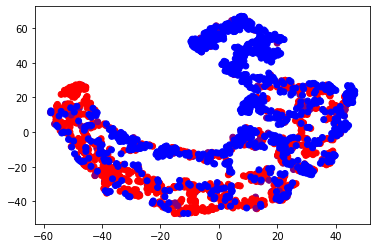

In [2]:
# # Sort these
# np.sort(pums_real)
# np.sort(pums_fake)
# t = 500
# inds = []

# from scipy.spatial.distance import cdist
# dist = cdist(pums_real, pums_fake)
# print(dist)
# for d, i in np.ndenumerate(dist):
#     if np.sum(d) < t:
#         inds.append(i)


comb = np.vstack((pums_real, pums_fake))
embedding_1 = TSNE(n_components=2).fit_transform(comb)
x,y = embedding_1.T
l = int(len(x) / 2)
# color_1 = np.ones((l,3))/4.0
# color_2 = np.ones((l,3))/2.0
# np.vstack((color_1,color_2))
# for each in comb:

plt.scatter(x,y,c=['purple' if i in inds else 'red' for i in range(l)]+['purple' if j in inds else 'blue' for j in range(l)])
plt.show()

#embedding_2 = TSNE(n_components=2).fit_transform(pums_fake)
# add titles to axes
# x,y = embedding_2.T
# plt.scatter(x,y)
# plt.show()

In [ ]:
pd_pums_less_fake = pd.read_csv("datasets/mwem_PUMS_less_private.csv")

pums_less_fake = pd_pums_less_fake.to_numpy()

x,y = pums_real[:,0], pums_real[:,2]
plt.scatter(x,y)
plt.show()

x,y = pums_less_fake[:,0], pums_less_fake[:,2]
plt.scatter(x,y)
plt.show()

x,y = embedding_1.T
plt.scatter(x,y)
plt.show()

embedding_3 = TSNE(n_components=2).fit_transform(pums_less_fake)

x,y = embedding_3.T
plt.scatter(x,y)
plt.show()

In [ ]:
print(pd_pums_real.describe())
print(pd_pums_fake.describe())
print(pd_pums_less_fake.describe())

In [ ]:
import datacompy

comp = datacompy.Compare(
    pd_pums_real,
    pd_pums_fake,
    df1_name='Real', #Optional, defaults to 'df1'
    df2_name='Fake', #Optional, defaults to 'df2'
    on_index=True
)

print(comp.report())